<a href="https://colab.research.google.com/github/sukjaebaboya/ConWaste/blob/main/YOLACT_train_210522.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cython needs to be installed before pycocotools
!pip install cython
!pip install opencv-python pillow pycocotools matplotlib
# Downgrade torch to accommodate DCNv2
!pip install torchvision==0.5.0
!pip install torch==1.4.0
# Make sure we're in the top folder
%cd /content
# Clone the repo
!git clone https://github.com/dbolya/yolact.git
# Change to the right directory
%cd /content/yolact/external/DCNv2
# Build DCNv2
!python setup.py build develop

     |████████████████████████████████| 4.0MB 14.9MB/s 
     |████████████████████████████████| 753.4MB 20kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
/content
Cloning into 'yolact'...
remote: Enumerating objects: 2936, done.
remote: Total 2936 (delta 0), reused 0 (delta 0), pack-reused 2936
Receiving objects: 100% (2936/2936), 21.20 MiB | 23.99 MiB/s, done.
Resolving deltas: 100% (2003/2003), done.
/content/yolact/external/DCNv2
running build
running build_ext
building '_ext' extension
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/content
creating build/temp.linux-x86_64-3.7/content/yolact
creating

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [44]:
# Move dataset folder
%cd /content
import shutil
shutil.move('drive/MyDrive/ConWaste/images', 'yolact/data/images')
shutil.move('drive/MyDrive/ConWaste/conwaste_coco.json', 'yolact/data/conwaste_coco.json')
shutil.move('drive/MyDrive/ConWaste/config.py', 'yolact/data/config.py')
# Clone the repo
#!git clone https://github.com/chentinghao/download_google_drive.git
# Create a new directory for the pre-trained weights
!mkdir -p /content/yolact/weights
shutil.move('drive/MyDrive/ConWaste/resnet50-19c8e357.pth', 'yolact/weights/resnet50-19c8e357.pth')

/content


FileNotFoundError: ignored

# --------------------- DATASETS --------------------------- #
yolact_conwaste_dataset = dataset_base.copy({
    'name': 'mixed',

    'train_images': './data/images/',
    'valid_images': './data/images/',

    'train_info': './data/conwaste_coco.json',
    'valid_info': './data/conwaste_coco.json',
    'has_gt': True,   

    'class_names': ('mixed'),
    
})


# --------------------YOLACT v1.0 CONFIGS -------------------- # 

...

yolact_conwaste_config = yolact_resnet50_config.copy({
    'name': 'yolact_resnet50_conwaste', # Will default to yolact_resnet50_pascal
    
    # Dataset stuff
    'dataset': yolact_conwaste_dataset,
    'num_classes': len(yolact_conwaste_dataset.class_names) + 1,

    'max_size' : 416,
    'max_iter': 120000,
    'lr_steps': (60000, 100000),
    
    'backbone': yolact_resnet50_config.backbone.copy({
        'pred_scales': [[32], [64], [128], [256], [512]],
        'use_square_anchors': False,
    })
})

In [35]:
%cd /content/yolact
#!python train.py --config=yolact_conwaste_config  --resume=weights/yolact_plus_resnet50_54_800000.pth --start_iter=0  --batch_size=5
!python train.py --config=yolact_conwaste_config --resume=weights/resnet50-19c8e357.pth --start_iter=-0 --batch_size=1

/content/yolact
Scaling parameters by 0.12 to account for a batch size of 1.
Per-GPU batch size is less than the recommended limit for batch norm. Disabling batch norm.
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Resuming training, loading weights/resnet50-19c8e357.pth...
Traceback (most recent call last):
  File "train.py", line 504, in <module>
    train()
  File "train.py", line 207, in train
    yolact_net.load_weights(args.resume)
  File "/content/yolact/yolact.py", line 490, in load_weights
    self.load_state_dict(state_dict)
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 830, in load_state_dict
    self.__class__.__name__, "\n\t".join(error_msgs)))
RuntimeError: Error(s) in loading state_dict for Yolact:
	Missing key(s) in state_dict: "backbone.layers.0.0.conv1.weight", "backbone.layers.0.0.bn1.weight", "backbone.layers.0.0.

In [46]:
%cd /content/yolact
#!python train.py --config=yolact_resnet50_conwaste_config --resume=weights/yolact_plus_resnet50_54_800000.pth --start_iter=0 --batch_size=5
!python train.py --config=yolact_conwaste_config --batch_size=1 

/content/yolact/utils/augmentations.py:309: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  mode = random.choice(self.sample_options)
/content/yolact/utils/augmentations.py:309: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  mode = random.choice(self.sample_options)
/content/yolact/utils/augmentations.py:309: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creati

In [57]:
# Move up to the top level directory
%cd /content

# Make a new directory for the test images
!mkdir /content/test_images

# Delete any previous output_images folder (in case we're running this more than once)
!rm /content/output_images -r

# Create a new directory for output images
!mkdir -p /content/output_images

/content


In [63]:
# Run inference using our pre-trained weights on all images in the directory
%cd /content
!python ./yolact/eval.py --trained_model=./yolact/weights/yolact_resnet50_conwaste_10999_110000.pth --config=yolact_conwaste_config --score_threshold=0.15 --top_k=15 --images=test_images:output_images

/content
Loading model... Done.

test_images/conwaste2.jpg -> output_images/conwaste2.png
test_images/conwaste4.jpg -> output_images/conwaste4.png
Traceback (most recent call last):
  File "./yolact/eval.py", line 1105, in <module>
    evaluate(net, dataset)
  File "./yolact/eval.py", line 885, in evaluate
    evalimages(net, inp, out)
  File "./yolact/eval.py", line 623, in evalimages
    evalimage(net, path, out_path)
  File "./yolact/eval.py", line 596, in evalimage
    frame = torch.from_numpy(cv2.imread(path)).cuda().float()
TypeError: expected np.ndarray (got NoneType)


output_images/conwaste4.png


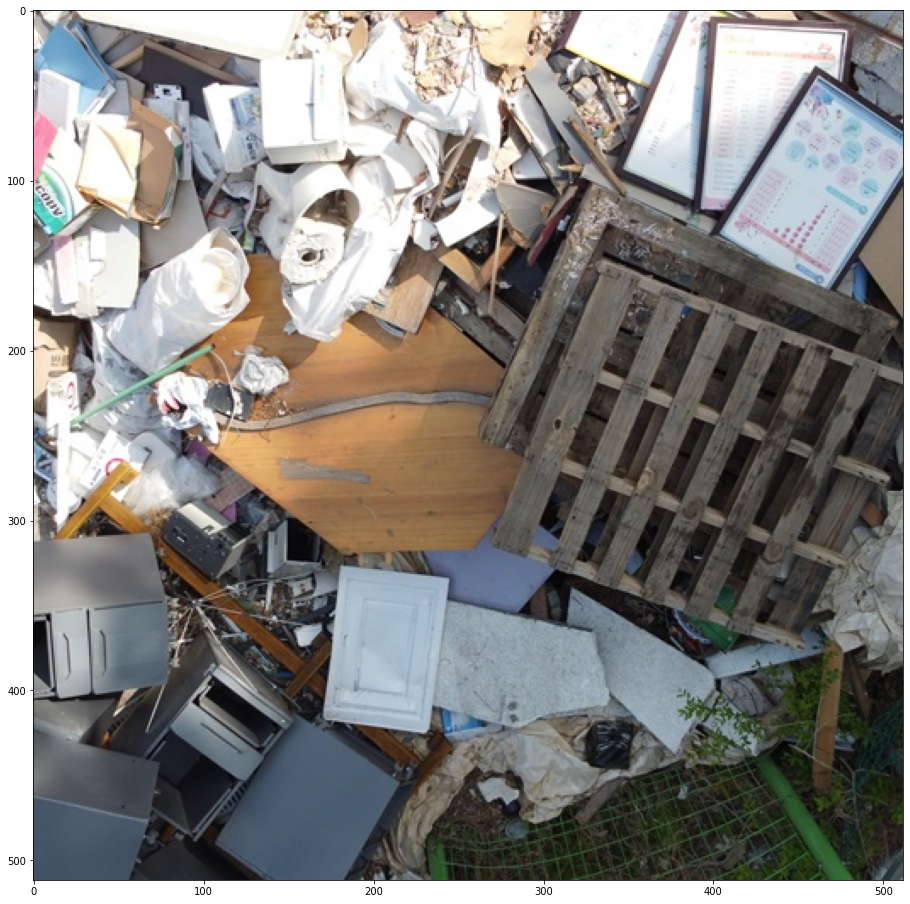

output_images/conwaste2.png


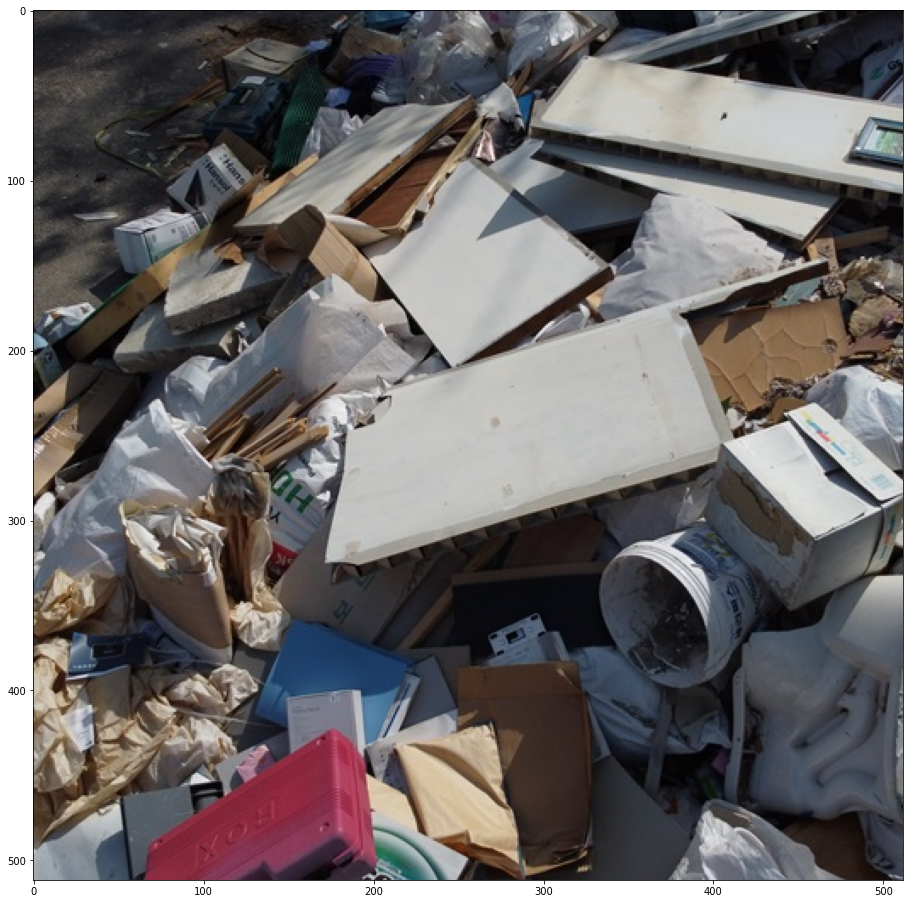

In [64]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

output_images = Path('output_images')

def show_image(img_path):
  img = cv2.imread(img_path)
  img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(16,16))
  plt.imshow(img_cvt)
  plt.show()

# Iterate through all of the output images and display them
for img_path in output_images.iterdir():
  print(img_path)
  show_image(str(img_path))

# Run Inference on Video
I can't figure out how to get Google Colab to show the output video in the notebook, so I've uploaded the video to YouTube. The mask quality is incredible. There are some false positives because it thinks the rocks are sheep, but we'll give it a pass because it's never been told what a rock is before (COCO dataset doesn't contain rocks) and the rocks do look a bit sheepish.


In [ ]:
from IPython.display import HTML
HTML('<iframe width="1280" height="720" src="https://www.youtube.com/embed/bQgtmbzN7jg" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

If you'd like to process your own video, you can modify the steps below.

In [ ]:
# Make a new directory for the test images
!mkdir -p /content/test_video

# Move to the top level directory
%cd /content

# Download the file
# https://drive.google.com/file/d/1I4fivRLniVNt_LcWqhQNehTSdEkZ4ytW/view?usp=sharing
# Note that file_id is extracted from the share URL above, it'll be different for every file
file_id = "1I4fivRLniVNt_LcWqhQNehTSdEkZ4ytW"
file_path = "/content/test_video/giraffes_full_720.mp4" # <- this is the destination path

!python /content/download_google_drive/download_gdrive.py {file_id} {file_path}

!ls /content/test_video

Now we run inference.

In [ ]:
%cd /content
!mkdir -p /content/output_videos
output_path = "/content/output_videos/giraffes_full_720_output.mp4"
!python ./yolact/eval.py --trained_model=./yolact/weights/yolact_plus_resnet50_54_800000.pth --score_threshold=0.15 --top_k=15 --video_multiframe=4 --video={file_path}:{output_path}

## Download the output file
In this part, we'll mount your Google Drive and you can copy the file somewhere over there. I tried using the google.colab.files library to download the file, but it doesn't seem to like big video files.

- You will need to authorize your Drive to connect, then it basically just links your drive as if it's a folder on this cloud computer.
- **Be careful** because if you start deleting/modifying files in this folder, you will modify your personal Google Drive.


In [ ]:
!mkdir -p /content/drive/My\ Drive/YOLACT_output
%cd /content/drive/My\ Drive/YOLACT_output
!ls

In [ ]:
!cp {output_path} /content/drive/My\ Drive/YOLACT_output/giraffes_full_720_output.mp4

## Find the Video on Google Drive
Now you should be able to view the file on your Google Drive in the YOLACT_output folder.